# Minimization - Golden Section Search

The Golden Section Search finds the **minimum** of a one dimensional function within an interval. The function should be unimodal, *i.e.*, having only one minimum within the interval.

## Code: `minGolden` function

In [ ]:
def minGolden(func, xl, xu, tol = 1e-4, maxit = 50, *args): #minGolden function
    """Finds the minimum of a function using golden section search method

    minGolden(func, xl, xu, tol = 1e-4, maxit = 50, *args)
    Finds the minimum of a one-dimensional function within an interval
    using golden section search method
    Input:
    - func: an anonymous function for f(x)
    - xl, xu: lower and upper limits of the interval
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xmin: the location of the minimum
    - fx: the minimum value of function
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
    small = 1e-20 # a small number
    phi = (1 + 5**0.5) / 2;  #golden ratio
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
        
    d = (phi - 1) * (xu - xl)
    x1 = xl + d
    x2 = xu - d
    f1 = func(x1, *args) #func value at x1
    f2 = func(x2, *args) #func value at x2    
    
    #                         |<------ d ----->|
    # arrangement of points: xl ..... x2 ..... x1 ..... xu
    #                                 |<------ d ------>|
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol) 
                                      # and iter < maxit continue the loop
       iter = iter + 1 # increment iter
       dx = xu - xl
       if f1 < f2:  # x1 is the new estimate of min -> xmin=x1, discard [xl,x2]
           xmin = x1
           xl = x2
           x2 = x1
           f2 = f1
           d = (phi - 1) * (xu - xl)
           x1 = xl + d
           f1 = func(x1, *args)
       else: # f2 >= f1: x2 is the new estimate of min -> xmin=x2, discard [x2,xu]
           xmin = x2
           xu = x1
           x1 = x2
           f1 = f2
           d = (phi - 1) * (xu - xl)
           x2 = xu - d
           f2 = func(x2, *args)    
       
       err = (2 - phi) * abs(dx / (xmin + small)) * 100  # relative approximate error (%)
                                                       # (a small number is added to the 
                                                       # denominator to avoid /0 in case xm=0)
    
    fmin = func(xmin, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: minGolden function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')
    return xmin, fmin, err, iter   #returns xmin, fmin, err, iter

### Example 1 - minimization

*Find* the minumim of $f(x)=x^2-5x+10$ in [1,3] interval.

min. location: x=  2.50000026874525
min. of f(x)=  3.750000000000072
approximate error =  6.957422431154259e-05 %
number of iterations =  28


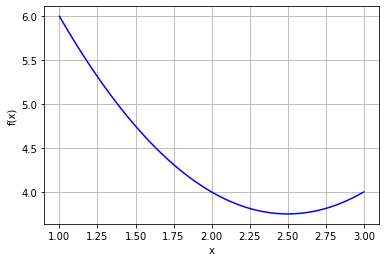

In [ ]:
f = lambda x: x**2- 5 * x + 10  #anonymous function definition
xmin, fmin, err , iter= minGolden(f, 1, 3)  #calling the minGolden function with the default tol and maxit values
print('min. location: x= ', xmin)
print('min. of f(x)= ', fmin)
print('approximate error = ', err, '%')
print('number of iterations = ', iter)

import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 3, 100)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid('true')

The minimum of the function is correctly calculated, compared with the analytical solution $x_t=2.5$ and consistent with the plot of the function.  The approximate error obtained is less the specified error tolerance and the number of iterations is less than its maximum values. These indicate that the function is terminated because the error stopping criterion is met. The minimum value of the function is also provided by the function.

The analytical solution of the root in this example is $x_t=2.5$ which can be used to calculate the true error:

In [ ]:
xt=2.5             # true value of the root
et=abs((xt-xmin)/xt)*100  # true error (%)
print('true value of the min. location: x= ' ,xt)
print('true error =  ' ,et, '%')

true value of the min. location: x=  2.5
true error =   1.0749810002153026e-05 %


This shows that the root is calculated quite accurately with the default error tolerance. For demonstration, let's make it less accurate by setting a larger error tolerance value.


## Maximization
To find the maximum of a function, we apply the Golden section search for $-f(x)$. This is because $-f(x)$ is the mirror image of $f(x)$ with respect to x axis. Therefore, the maximum value ($f_{max}$) of the function $f(x)$ is at the same location of the minimum value ($f_{min}$) of $-f(x)$ and $f_{max}=-f_{min}$. This is shown in the following example.

### Example 2 - maximization
Find the maximum of the function $f(x)=-x^2+6x-8.5$ in the interval [2,4].

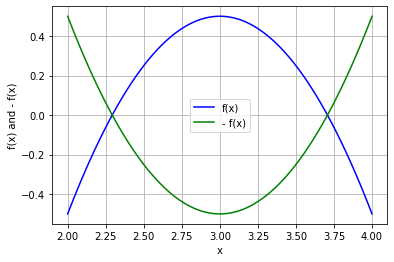

In [ ]:
# plotting the function
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: -x**2 + 6 * x - 8.5  #anonymous function definition
x = np.linspace(2, 4, 100)
y = f(x)
yminus = -f(x)
plt.plot(x,y,'b-',x,yminus, 'g-')
plt.xlabel('x')
plt.ylabel('f(x) and - f(x)')
plt.grid('true')
plt.legend(['f(x)','- f(x)'],loc='best')

The plot above shows that the minimum of $-f(x)$ is at the same location of maximum of $f(x)$ and that the maximum of $f(x)$ is the negative value of the minimum of $-f(x)$. Therefore, we first apply the Golden Section Search method to $-f(x)$:

In [ ]:
f = lambda x: -x**2 + 6 * x - 8.5  #anonymous function definition
fminus = lambda x: -f(x)
xmin, fminus_min, err , iter= minGolden(fminus, 1, 3)  #calling the minGolden function with the default tol and maxit values
print('min. location: x= ', xmin)
print('min. of -f(x)= ', fminus_min)
print('approximate error = ', err, '%')
print('number of iterations = ', iter)

min. location: x=  2.9999971856632053
min. of -f(x)=  -0.499999999992081
approximate error =  9.381131449087556e-05 %
number of iterations =  27


Next, we calculate the maximum of $f(x)$:

In [ ]:
xmax = xmin
fmax = -fminus_min
print('max. location: x= ', xmax)
print('max. of f(x)= ', fmax)

max. location: x=  2.9999971856632053
max. of f(x)=  0.499999999992081


The results obtained are consistent with the plot shown above.

### Optimization using `fmin`:
The root can also be calculated using the built-in [fmin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) from the Python SciPy package. Let's use `fmin` to calculate the minimum of $f(x)=x^2-5x+10$ near $x=2$, similar to that done in Example 1.

In [ ]:
from scipy.optimize import fmin
x0 = 2 # initial guess
tol = 1e-2 # error tolerance
f = lambda x: x**2- 5 * x + 10 
xf = fmin(f, x0, xtol = tol)
x_fmin=xf[0]
print('the minumim x location predicted by fmin = ' , x_fmin)

Optimization terminated successfully.
         Current function value: 3.750000
         Iterations: 8
         Function evaluations: 16
the minumim x location predicted by fmin =  2.5000000000000013


The result is consistent with that in Example 1. Let's calculate the maximum of the function considered in Example 2: $f(x)=-x^2+6x-8.5$ near $x=2$.

In [ ]:
f = lambda x: -x**2 + 6 * x - 8.5  #anonymous function definition
fminus = lambda x: -f(x)
x0 = 2 # initial guess
tol = 1e-2 # error tolerance
xf = fmin(fminus, x0, xtol = tol)
xmax=xf[0]
print('the maximum x location predicted by fmin = ' , xmax)
print('the minimum value of the function -f(x) = ' , fminus(xmax))
print('the maximum value of the function f(x) = ' , f(xmax))


Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 10
         Function evaluations: 20
the maximum x location predicted by fmin =  3.0000000000000027
the minimum value of the function -f(x) =  -0.4999999999999982
the maximum value of the function f(x) =  0.4999999999999982


The result are consistent with those obtained in Example 2.

# Exercise 1
Find the **minimum** location and value of $f(x)=2x+\frac{3}{x}$ in the [0.1 5] interval. Verify your answers by (a) by plotting the the function and (b) comparing with `fmin` built-in function results. [*Answer: $x_{min} = 1.2247$*]

# Exercise 2
Find the **maximum** location and value of $f(x)=-x^2+8x-11$ in the [2 10] interval. Verify your answers by (a) by plotting the the function and (b) comparing with `fmin` built-in function results. [*Answer: $f_{max} = 5$*]